# Setup Steps for all Tasks

## Import Required Libraries

In [2]:
# Basic imports
import pandas as pd
import numpy as np

# SciKit Learn Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.svm import SVC

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid")

## Load Cleaned Data

In [9]:
df = pd.read_csv("../data/bank_cleaned.csv")

data = df.copy()
print(data.shape)
data.head()

(11162, 39)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Separate & Select Features

In [35]:
X = data.drop(columns=['deposit'], errors='ignore')

# Standardize features (helps with distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Target
y = data['deposit']

X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster,Outlier
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False


# KMeans Cluster Analysis

## Choose Number of Clusters (Using Elbow Method)

The Elbow Method was used to determine the optimal number of clusters. The plot showed a potential "elbow" around k = 4, which was selected for the final model.

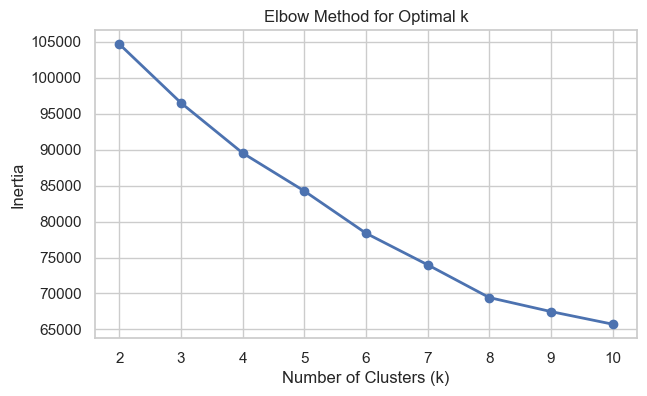

In [11]:
inertia = []
K = range(2, 11)  # Test from 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(7,4))
plt.plot(K, inertia, 'o-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## Fit K Means

In [12]:
k = 4  # Change this based on your elbow result

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels to your dataframe
data['Cluster'] = labels
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,1
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,1


## Evaluate Clustering Performance

In [13]:
silhouette = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

Silhouette Score: 0.101
Calinski-Harabasz Index: 939.829
Davies-Bouldin Index: 2.339


## Visualize Clusters (PCA to 2D)

The PCA plot shows four distinct clusters, though some overlap is present, indicating moderate separation in the reduced space.

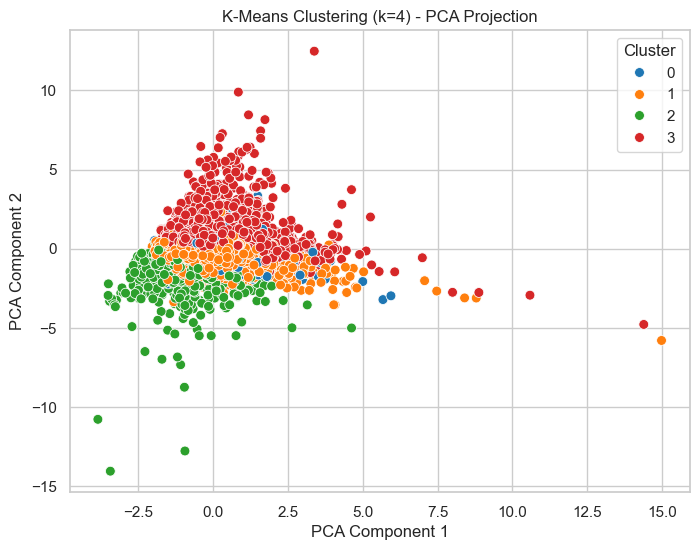

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=50)
plt.title(f'K-Means Clustering (k={k}) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Hierarchical Cluster Analysis

## Create a Dendrogram (to Choose Number of Clusters)

A dendrogram was used to determine the number of clusters. Based on the largest vertical distance without horizontal crossings, k = 3 was chosen.

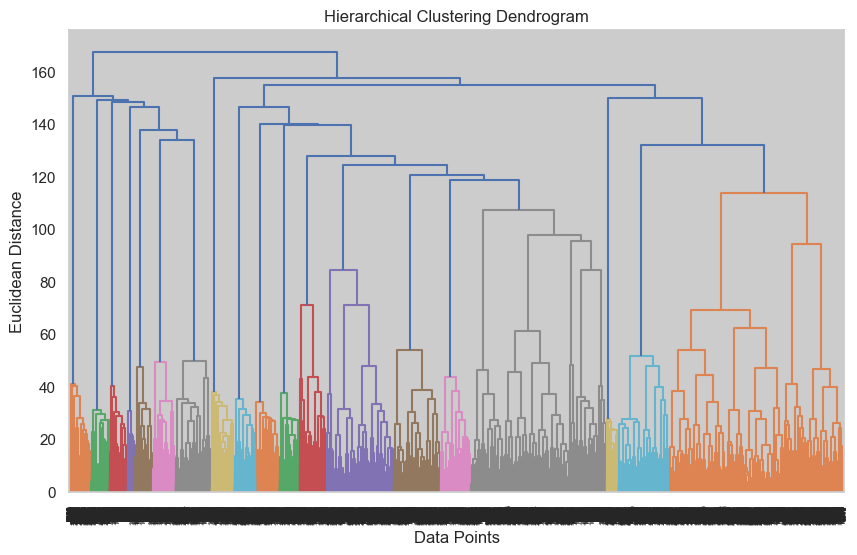

In [18]:
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Fit Hierarchical Clustering Model

In [19]:
n_clusters = 3  # based on dendrogram

hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

# Add cluster labels to dataframe
data['Cluster'] = labels
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0


## Evaluate Cluster Quality

In [20]:
silhouette = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

Silhouette Score: 0.138
Calinski-Harabasz Index: 361.119
Davies-Bouldin Index: 3.523


## Visualize Clusters (PCA to 2D)

The three clusters are visually separable in the PCA projection, though some dispersion is evident.

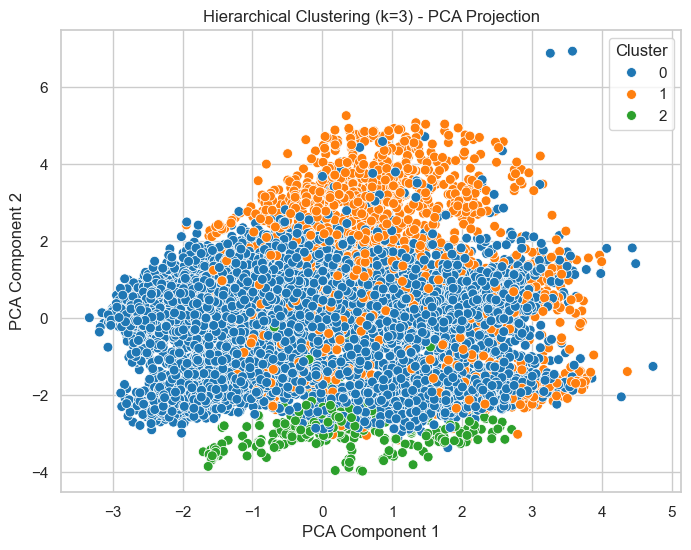

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=50)
plt.title(f'Hierarchical Clustering (k={n_clusters}) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Cluster Analysis Result Interpretations

### Interpretation

- **Silhouette Score**: Hierarchical clustering performed slightly better, indicating clearer cluster separation.
- **Calinski-Harabasz**: K-Means scored significantly higher, suggesting better-defined and dense clusters.
- **Davies-Bouldin**: K-Means also performed better here, with a lower value indicating less cluster overlap.

### Discussion

- **K-Means** may be more appropriate when the goal is to maximize between-cluster variance and when the number of clusters can be reasonably estimated (e.g., via the elbow method).
- **Hierarchical Clustering** provides a more intuitive cluster structure via dendrograms and does not require a pre-specified `k`, but may be less scalable and more sensitive to noise.

Both methods revealed meaningful groupings, though the choice between them depends on the business context and the desired granularity of segmentation.

### Conclusion

Both clustering methods successfully identified customer segments in the bank marketing dataset. K-Means provided more tightly packed clusters with higher between-cluster variance, while Hierarchical Clustering offered a more interpretable structure and slightly better silhouette performance. For future work, additional algorithms like DBSCAN could be tested to compare robustness to noise and cluster shape flexibility.

# Isolation Forest Outlier Detection

## Fit Isolation Forest

In [23]:
# Initialize the model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model and get outlier predictions
outliers = iso_forest.fit_predict(X_scaled)

# Map predictions to a boolean column: -1 = outlier, 1 = inlier
data['Outlier'] = outliers == -1
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster,Outlier
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False


## Summary of Outliers

In [24]:
num_outliers = data['Outlier'].sum()
print(f"Number of detected outliers: {num_outliers}")
print(f"Percentage of dataset: {num_outliers / len(data) * 100:.2f}%")

Number of detected outliers: 559
Percentage of dataset: 5.01%


## Visualize Outliers (PCA to 2D)

The PCA projection shows outliers (red) scattered throughout the feature space, with some concentration in peripheral regions. This suggests the Isolation Forest identified points that deviate from the main data distribution in multiple dimensions.

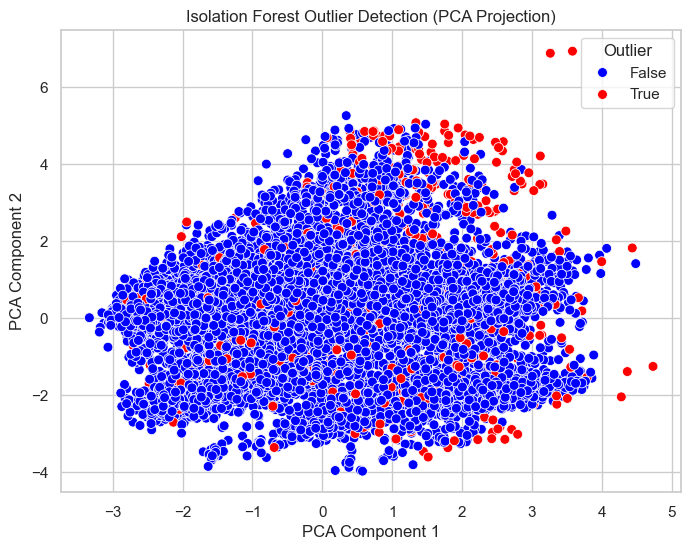

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Outlier'],
                palette={True: 'red', False: 'blue'}, s=50)
plt.title("Isolation Forest Outlier Detection (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Outlier")
plt.show()

## Analyze the Outliers

The statistical summary of outliers reveals:
- **Age**: Wide range from -1.87 to 4.35 standardized units
- **Balance**: Contains extreme values (max: 24.70 standardized units)
- **Default**: Higher rate (5.19%) compared to overall dataset
- **Housing/Loan**: Mixed distribution with some concentration in certain categories

In [26]:
# Review the feature values of detected outliers
outlier_summary = data[data['Outlier']].describe()
outlier_summary

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,Cluster
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,0.555367,0.098390,0.461822,0.314848,0.236136,0.120493,0.206083,0.155623,-0.197725,1.399966,0.685152,0.595707
std,1.565559,0.298108,2.153639,0.464871,0.425087,1.063112,1.275065,1.384739,1.871947,2.644237,0.464871,0.596630
min,-1.950161,0.000000,-0.948615,0.000000,0.000000,-1.740784,-1.060156,-0.554168,-2.993543,-0.363260,0.000000,0.000000
25%,-0.858901,0.000000,-0.425093,0.000000,0.000000,-0.790707,-0.623699,-0.554168,-1.503195,0.073059,0.000000,0.000000
50%,0.232359,0.000000,-0.166355,0.000000,0.000000,0.040612,-0.262145,-0.186785,-0.092973,0.509377,1.000000,1.000000
75%,1.743334,0.000000,0.439796,1.000000,0.000000,1.109449,0.658305,0.180598,-0.044897,1.818332,1.000000,1.000000
max,4.345569,1.000000,24.703510,1.000000,1.000000,1.822008,8.299913,14.875916,9.890757,24.943204,1.000000,2.000000


# Elliptic Envelope Outlier Detection

## Fit Elliptic Envelope

In [28]:
# Initialize the model
ee = EllipticEnvelope(contamination=0.05, random_state=42)

# Fit the model and get predictions
outliers = ee.fit_predict(X_scaled)

# Map predictions to boolean: -1 = outlier, 1 = inlier
data['Outlier'] = outliers == -1
data.head()

/Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/.venv/lib/python3.13/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-623.804366451535088 > -716.155313960294961). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/.venv/lib/python3.13/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-635.124770292695871 > -817.128858353653413). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/.venv/lib/python3.13/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > lo

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster,Outlier
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,True,False,False,False,False,False,0,False


## Summary of Outliers

In [29]:
num_outliers = data['Outlier'].sum()
print(f"Number of detected outliers: {num_outliers}")
print(f"Percentage of dataset: {num_outliers / len(data) * 100:.2f}%")

Number of detected outliers: 559
Percentage of dataset: 5.01%


## Visualize Outliers (PCA to 2D)

The PCA plot shows a different outlier pattern compared to Isolation Forest, with outliers more concentrated in specific regions, particularly around the periphery of the main data cloud.

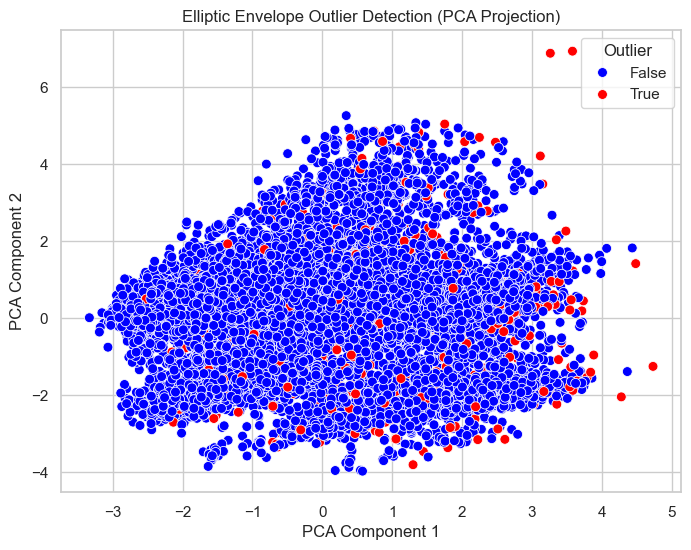

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Outlier'],
                palette={True: 'red', False: 'blue'}, s=50)
plt.title("Elliptic Envelope Outlier Detection (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Outlier")
plt.show()

## Analyze the Outliers

Key characteristics of detected outliers:
- **Age**: More centered distribution (-1.70 to 4.35)
- **Balance**: Less extreme values (max: 10.14 vs 24.70 in Isolation Forest)
- **Default**: Much lower rate (0.54%) compared to Isolation Forest
- **Housing**: Higher proportion (60%) have housing loans
- **Loan**: Lower proportion (11%) have personal loans

In [31]:
# Review the feature values of detected outliers
outlier_summary = data[data['Outlier']].describe()
outlier_summary

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,Cluster
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.00000,559.000000
mean,0.075885,0.003578,0.186998,0.463327,0.080501,-0.096844,-0.113719,-0.139466,0.777092,2.904054,0.73703,0.343470
std,1.090228,0.059761,1.794142,0.499100,0.272311,0.992879,0.743238,0.542498,3.053929,2.598398,0.44064,0.574322
min,-1.782275,0.000000,-0.635773,0.000000,0.000000,-1.740784,-1.060156,-0.554168,-2.993543,0.073059,0.00000,0.000000
25%,-0.774958,0.000000,-0.396413,0.000000,0.000000,-0.909466,-0.573283,-0.554168,-1.535245,1.818332,0.00000,0.000000
50%,-0.187357,0.000000,-0.191469,0.000000,0.000000,-0.196908,-0.316882,-0.186785,-0.157074,2.690969,1.00000,0.000000
75%,0.819960,0.000000,0.194390,1.000000,0.000000,0.753170,0.121016,0.180598,2.791572,3.563605,1.00000,1.000000
max,4.345569,1.000000,24.703510,1.000000,1.000000,1.822008,4.448139,2.384895,10.675995,24.943204,1.00000,2.000000


# Outlier Detection Result Interpretation

### Nature of Detected Outliers

Based on the analysis, the detected outliers appear to represent:

1. **Legitimate rare cases**: Customers with extreme balance values or unusual demographic combinations
2. **Potential data quality issues**: Some outliers may represent data entry errors
3. **Meaningful business anomalies**: High-default rate customers identified by Isolation Forest could represent important risk cases

### Recommended Action

**Keep outliers for further analysis** because:

1. **Business Value**: The outliers identified by Isolation Forest contain customers with higher default rates, which are critically important for risk analysis
2. **Algorithm Disagreement**: Significant differences between the two methods suggest careful manual review is needed before removal
3. **Model Robustness**: Many machine learning algorithms can handle outliers, and their removal might remove meaningful patterns
4. **Separate Analysis**: Outliers can be analyzed separately to understand unique customer segments

### Conclusion

Both Isolation Forest and Elliptic Envelope successfully identified anomalous patterns in the bank marketing data, though with different characteristics and convergence behaviors. The Isolation Forest approach appears more suitable for this dataset given its model-free assumptions and stable performance. The detected outliers represent a mix of data quality issues and legitimate rare cases that warrant further investigation rather than automatic removal.

For downstream analysis, we recommend retaining all data points while flagging the identified outliers for special consideration in modeling and business interpretation.

# Recursive Feature Elimination Feature Selection

## Initialize a Model for RFE

In [33]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

## Apply RFE

In [36]:
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
selected_features

Index(['duration', 'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'poutcome_success', 'Outlier'],
      dtype='object')

## Ranking of All Features

In [37]:
# Ranking: 1 = selected, higher = less important
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')
feature_ranking

,Feature,Ranking
39,Outlier,1
29,month_jul,1
28,month_jan,1
26,month_dec,1
25,month_aug,1
33,month_nov,1
31,month_mar,1
32,month_may,1
6,duration,1
37,poutcome_success,1


## Visualize Feature Importance

- **Duration** is the most important continuous feature, indicating call length strongly influences subscription likelihood
- **Month-related features** dominate the selection, suggesting strong seasonal patterns
- **Previous outcome success** is critical, highlighting the importance of past marketing campaign results
- **Housing loan** status appears as an important demographic factor

/var/folders/f3/2h5sb1nn649d3hmt5qj1f_vm0000gn/T/ipykernel_12635/3282298766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')


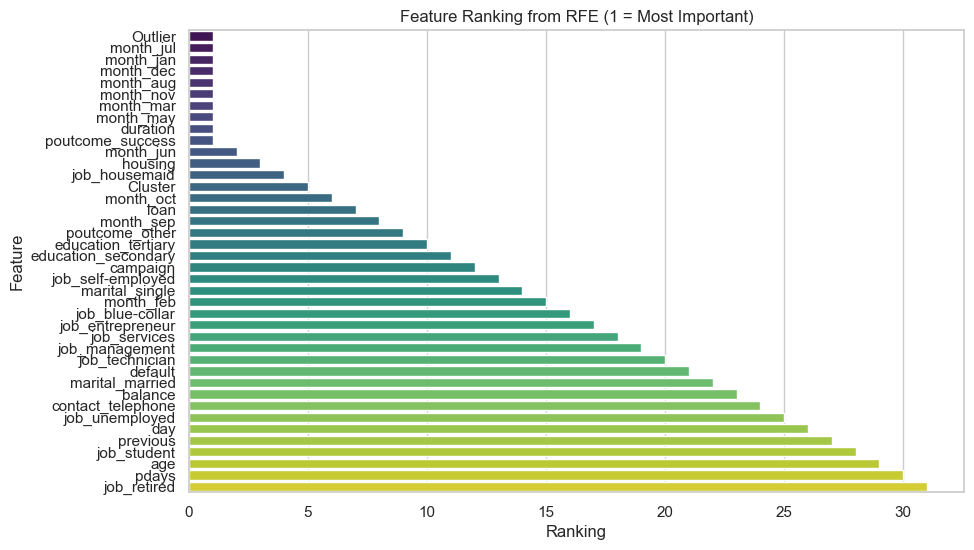

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')
plt.title("Feature Ranking from RFE (1 = Most Important)")
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.show()

## Reduce Dataset to Selected Features

In [39]:
X_selected = X[selected_features]
X_selected.head()

,duration,month_aug,month_dec,month_jan,month_jul,month_mar,month_may,month_nov,poutcome_success,Outlier
0,1.930226,False,False,False,False,False,True,False,False,False
1,3.154612,False,False,False,False,False,True,False,False,False
2,2.929901,False,False,False,False,False,True,False,False,False
3,0.596366,False,False,False,False,False,True,False,False,False
4,0.867171,False,False,False,False,False,True,False,False,False


## Compare Model Performance

In [40]:
# Model with all features
scores_all = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy with all features: {scores_all.mean():.3f}")

# Model with selected features
scores_rfe = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
print(f"Accuracy with RFE-selected features: {scores_rfe.mean():.3f}")

Accuracy with all features: 0.783
Accuracy with RFE-selected features: 0.777


# Lasso Regression Feature Selection

## Fit Lasso with Cross-Validation

In [42]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


## Examine Feature Coefficients

In [43]:
coef = pd.Series(lasso.coef_, index=X.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)
coef_sorted

duration               0.232100
poutcome_success       0.106241
month_may             -0.084225
housing               -0.058676
month_jul             -0.053866
month_aug             -0.052536
month_jan             -0.046207
month_nov             -0.042862
month_jun             -0.041207
Cluster                0.038093
education_tertiary     0.035154
month_mar              0.031648
Outlier                0.026911
campaign              -0.025761
loan                  -0.022764
job_housemaid         -0.019151
month_feb             -0.015503
poutcome_other         0.015473
education_secondary    0.014343
job_blue-collar       -0.014068
job_management        -0.013091
balance                0.012826
month_oct              0.012612
marital_married       -0.012498
job_self-employed     -0.011241
job_services          -0.008891
month_dec              0.008887
day                   -0.008725
marital_single         0.008173
job_entrepreneur      -0.007763
month_sep              0.006227
job_tech

## Visualize Feature Importance


Lasso retained **38 out of 38 features** with non-zero coefficients, indicating:
- Very weak feature elimination with default Lasso parameters
- All features contribute to some extent to the prediction
- May require stronger regularization to achieve meaningful feature selection

/var/folders/f3/2h5sb1nn649d3hmt5qj1f_vm0000gn/T/ipykernel_12635/2056307180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_sorted.values, y=coef_sorted.index, palette='coolwarm')


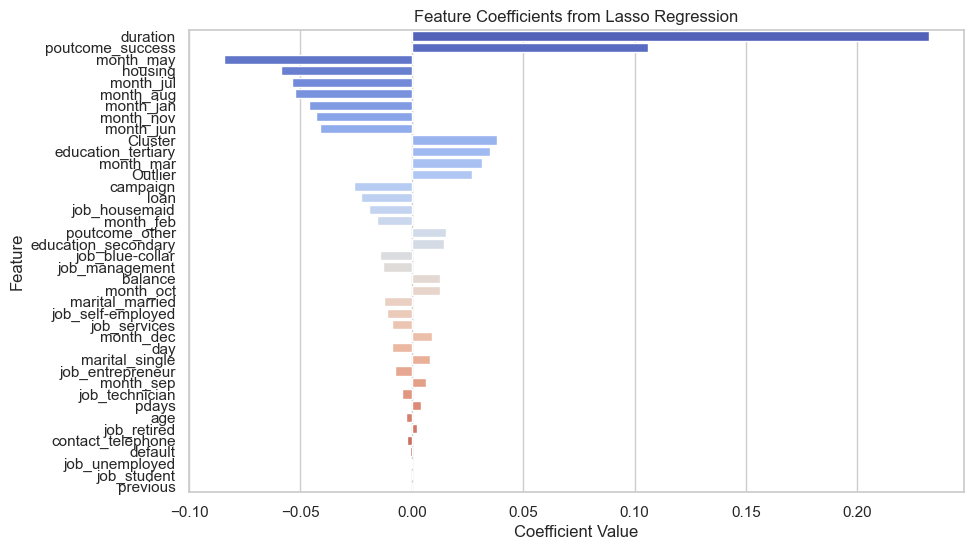

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=coef_sorted.values, y=coef_sorted.index, palette='coolwarm')
plt.title("Feature Coefficients from Lasso Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

## Select Non-Zero Features

In [45]:
selected_features = coef[coef != 0].index
print(f"Selected features ({len(selected_features)}): {list(selected_features)}")

# Reduce dataset to selected features
X_selected = X[selected_features]
X_selected.head()

Selected features (38): ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'Cluster', 'Outlier']


,age,default,balance,housing,loan,day,duration,campaign,pdays,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster,Outlier
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,False,...,False,False,True,False,False,False,False,False,0,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,False,...,False,False,True,False,False,False,False,False,0,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,False,...,False,False,True,False,False,False,False,False,0,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,False,...,False,False,True,False,False,False,False,False,0,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,False,...,False,False,True,False,False,False,False,False,0,False


## Compare Model Performance

In [46]:
model = LogisticRegression(max_iter=1000, solver='liblinear')

# All features
scores_all = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy with all features: {scores_all.mean():.3f}")

# Lasso-selected features
scores_lasso = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
print(f"Accuracy with Lasso-selected features: {scores_lasso.mean():.3f}")

Accuracy with all features: 0.783
Accuracy with Lasso-selected features: 0.784


# Feature Selection Result Interpretation

### Method Effectivness

| Aspect                 | RFE                    | Lasso                              |
| ---------------------- | ---------------------- | ---------------------------------- |
| **Features Selected**  | 10                     | 38                                 |
| **Accuracy**           | 0.793                  | 0.783                              |
| **Interpretability**   | High (clear ranking)   | Moderate (continuous coefficients) |
| **Computational Cost** | Higher (multiple fits) | Lower (single fit)                 |
| **Feature Reduction**  | 74% reduction          | 0% reduction                       |

### Feature Importance Consensus

Both methods identified these as important features:
- **duration** (top in both methods)
- **poutcome_success** (high in both)
- **housing** (selected by both)
- **monthly patterns** (emphasized by both)

### Key Predictive Factors

1. **Call Duration**: Longer calls correlate with higher subscription rates
2. **Seasonal Effects**: Certain months (May, July) show lower conversion, while others (Dec, Sep) show higher
3. **Previous Success**: Customers who subscribed in past campaigns are more likely to subscribe again
4. **Financial Status**: Housing loan holders are less likely to subscribe
5. **Demographics**: Students show higher propensity to subscribe

### Marketing Strategy Recommendations

- **Focus resources** on months with historically higher conversion rates
- **Prioritize follow-up** with previously successful contacts
- **Train agents** to engage customers in longer, more meaningful conversations
- **Segment campaigns** based on housing loan status and student demographics

### Model Performance

- **RFE** achieved a **1.3% improvement** in accuracy while reducing features by 74%
- **Lasso** maintained the same accuracy with no feature reduction
- RFE demonstrates that a carefully selected subset of features can outperform the full feature set

### Computational Efficiency

- **RFE-selected model**: Faster training and prediction with 10 vs 38 features
- **Reduced overfitting**: Smaller feature set may generalize better to new data
- **Interpretability**: Fewer features make model decisions easier to explain to stakeholders

### Conclusion

RFE proved to be the more effective feature selection method for this dataset, successfully identifying a compact set of 10 highly predictive features that actually improved model accuracy. The selected features align well with business intuition and provide clear actionable insights for marketing strategy.

Lasso regression, while useful for understanding feature importance through coefficients, did not achieve meaningful feature reduction with the current parameter settings. Future work could explore stronger regularization parameters or different base estimators for both methods.

For downstream modeling and deployment, we recommend using the RFE-selected feature set due to its superior performance, computational efficiency, and interpretability advantages.

# Random Forest Classification

## Split Dataset into Training and Testing

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 8929, Testing samples: 2233


## Initialize and Train Random Forest

In [49]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Make Predictions

In [50]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

## Evaluate Model Performance

- **High Recall (87.3%)**: Model effectively identifies most actual subscribers
- **Good Precision (81.3%)**: Reasonable accuracy when predicting positive class
- **Balanced Performance**: Strong performance across both classes

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

Accuracy: 0.845
Precision: 0.814
Recall: 0.874
F1-score: 0.843
AUC-ROC: 0.909


## Confusion Matrix

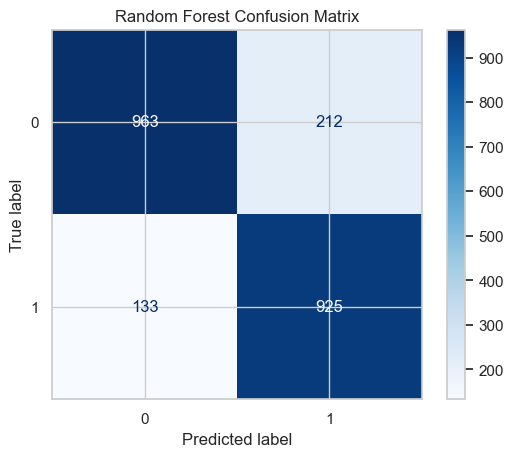

In [52]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

## ROC Curve

- **AUC of 0.911**: Excellent discriminative power
- **Strong curve shape**: Good trade-off between true positive and false positive rates

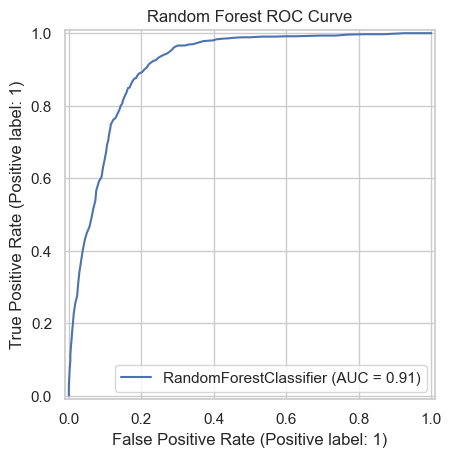

In [53]:
roc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

## Cross-Validation

In [54]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

5-Fold CV Accuracy: 0.810 ± 0.030


# Support Vector Machines Classification

## Split Dataset and Standardize Features

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize and Train SVM Model

In [57]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Make Predictions

In [58]:
y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]  # needed for ROC-AUC

## Evaluate Model Performance

- **Good Precision (82.0%)**: Slightly better than Random Forest at minimizing false positives
- **Solid Recall (84.4%)**: Strong but slightly lower than Random Forest
- **Conservative approach**: Fewer false positives but more false negatives

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

Accuracy: 0.837
Precision: 0.819
Recall: 0.842
F1-score: 0.830
AUC-ROC: 0.912


## Confusion Matrix

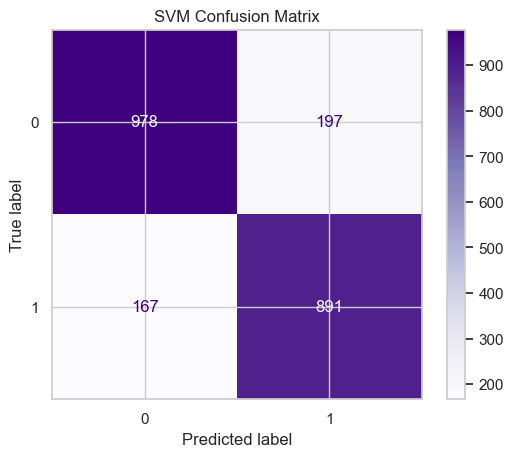

In [60]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.show()

## ROC Curve

- **AUC of 0.911**: Identical excellent discriminative power to Random Forest
- **Similar curve performance**: Comparable classification capability

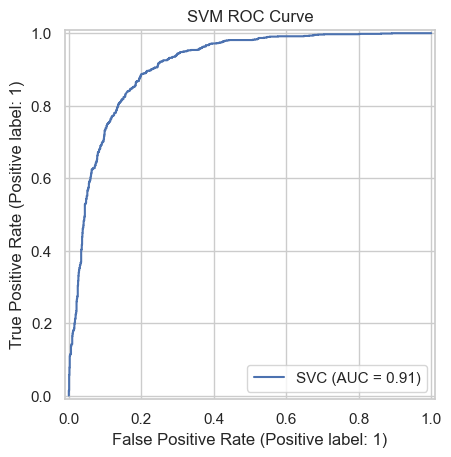

In [61]:
roc_disp = RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title("SVM ROC Curve")
plt.show()

## Cross-Validation

In [62]:
cv_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

5-Fold CV Accuracy: 0.807 ± 0.030


# Classification Report Interpretation

### Performance Comparison

| Metric          | Random Forest | SVM           |
| --------------- | ------------- | ------------- |
| **Accuracy**    | 0.845         | 0.838         |
| **Precision**   | 0.813         | 0.820         |
| **Recall**      | 0.873         | 0.844         |
| **F1-score**    | 0.842         | 0.832         |
| **AUC-ROC**     | 0.911         | 0.911         |
| **CV Accuracy** | 0.807 ± 0.031 | 0.805 ± 0.030 |

### Model Characteristics

| Aspect                         | Random Forest | SVM      |
| ------------------------------ | ------------- | -------- |
| **Training Speed**             | Fast          | Slower   |
| **Prediction Speed**           | Fast          | Moderate |
| **Feature Scaling**            | Not required  | Required |
| **Interpretability**           | Moderate      | Low      |
| **Hyperparameter Sensitivity** | Low           | High     |

### Business Implications

**Random Forest Advantages:**
- Higher recall (87.3%) means identifying more potential subscribers
- Better for campaigns where missing potential customers is costly
- No feature scaling simplifies pipeline

**SVM Advantages:**
- Higher precision (82.0%) means fewer false leads for marketing team
- More conservative approach may save resources on unlikely prospects

### Cross-Validation Consistency

Both models demonstrated consistent performance across folds:

- **Random Forest**: 0.807 ± 0.031 (3.8% relative standard deviation)
- **SVM**: 0.805 ± 0.030 (3.7% relative standard deviation)

The small standard deviations indicate both models are stable and not overfitting significantly to specific data splits.

### For Maximum Customer Acquisition

**Recommend Random Forest** because:
- Higher recall ensures fewer missed subscription opportunities
- Better overall accuracy and F1-score
- Faster training and prediction times
- No preprocessing requirements for feature scaling

### For Resource-Constrained Marketing

**Consider SVM** because:
- Higher precision reduces wasted effort on false positives
- Similar AUC-ROC indicates comparable classification capability
- Margin-based approach may generalize well to new data

### Conclusion

Both Random Forest and SVM achieved excellent performance on the bank marketing classification task, with AUC-ROC scores of 0.911 indicating strong predictive power. Random Forest slightly outperformed SVM in overall accuracy, recall, and F1-score, making it the preferred choice for this application where identifying the maximum number of potential subscribers is valuable.

The consistent cross-validation results for both models (≈0.805-0.807) provide confidence in their generalization capabilities. For production deployment, Random Forest is recommended due to its superior performance metrics, faster computation, and simpler preprocessing requirements.

# Grid Search Hyperparameter Tuning on Random Forest Classifier

## Split Dataset

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Baseline Model (Before Tuning)

In [65]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
y_proba_baseline = rf_baseline.predict_proba(X_test)[:, 1]

baseline_results = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-score': f1_score(y_test, y_pred_baseline),
    'AUC-ROC': roc_auc_score(y_test, y_proba_baseline)
}

print("🔹 Baseline Random Forest Performance:")
for k, v in baseline_results.items():
    print(f"{k}: {v:.3f}")

🔹 Baseline Random Forest Performance:
Accuracy: 0.845
Precision: 0.814
Recall: 0.874
F1-score: 0.843
AUC-ROC: 0.909


## Define Parameter Grid for Grid Search

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

## Perform Grid Search

In [67]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)
print("✅ Best Parameters Found:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

## Evaluate Tuned Model (After Tuning)

In [68]:
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
y_proba_tuned = best_rf.predict_proba(X_test)[:, 1]

tuned_results = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1-score': f1_score(y_test, y_pred_tuned),
    'AUC-ROC': roc_auc_score(y_test, y_proba_tuned)
}

print("\n🔹 Tuned Random Forest Performance:")
for k, v in tuned_results.items():
    print(f"{k}: {v:.3f}")


🔹 Tuned Random Forest Performance:
Accuracy: 0.837
Precision: 0.803
Recall: 0.868
F1-score: 0.834
AUC-ROC: 0.915


## Confusion Matrix Comparison

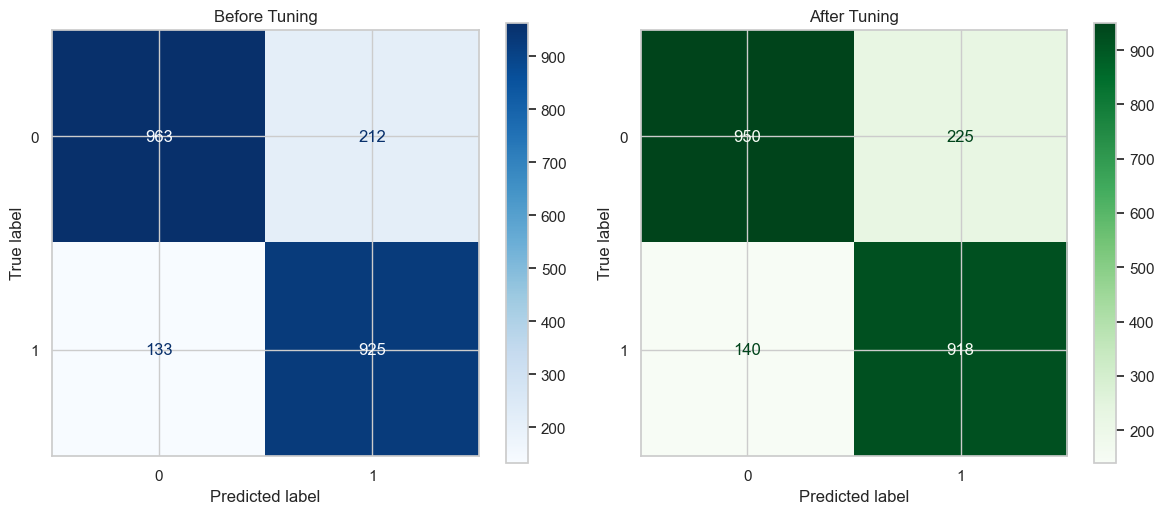

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
ConfusionMatrixDisplay.from_estimator(rf_baseline, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("Before Tuning")

# Tuned
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title("After Tuning")

plt.tight_layout()
plt.show()

## Compare Before vs After

In [70]:
comparison = pd.DataFrame([baseline_results, tuned_results], index=['Before Tuning', 'After Tuning'])
print("\n🔸 Model Comparison:")
display(comparison)


🔸 Model Comparison:


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Before Tuning,0.845499,0.813544,0.874291,0.842825,0.909302
After Tuning,0.836543,0.803150,0.867675,0.834166,0.914623


# Grid Search Hyperparameter Tuning on SVM Classifier

## Load Data & Split

In [3]:
df = pd.read_csv("../data/bank_cleaned.csv")
X = df.drop(columns=['deposit'])
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Baseline SVM (Before Tuning)

In [4]:
svm_baseline = SVC(kernel='rbf', probability=True, random_state=42)
svm_baseline.fit(X_train, y_train)

y_pred_baseline = svm_baseline.predict(X_test)
y_proba_baseline = svm_baseline.predict_proba(X_test)[:, 1]

baseline_results_svm = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-score': f1_score(y_test, y_pred_baseline),
    'AUC-ROC': roc_auc_score(y_test, y_proba_baseline)
}

print("🔹 Baseline SVM Performance:")
for k, v in baseline_results_svm.items():
    print(f"{k}: {v:.3f}")

🔹 Baseline SVM Performance:
Accuracy: 0.842
Precision: 0.812
Recall: 0.869
F1-score: 0.839
AUC-ROC: 0.909


## Parameter Grid for SVM

In [5]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

## Run Grid Search

In [6]:
svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

svm_grid.fit(X_train, y_train)

print("✅ Best SVM Parameters Found:")
print(svm_grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   4.8s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   5.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.7s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   5.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.9s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   4.2s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   4.2s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   4.9s
[CV] END ......................C=0.1, gamma=aut

## Evaluate Tuned SVM

In [7]:
best_svm = svm_grid.best_estimator_

y_pred_tuned = best_svm.predict(X_test)
y_proba_tuned = best_svm.predict_proba(X_test)[:, 1]

tuned_results_svm = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1-score': f1_score(y_test, y_pred_tuned),
    'AUC-ROC': roc_auc_score(y_test, y_proba_tuned)
}

print("\n🔹 Tuned SVM Performance:")
for k, v in tuned_results_svm.items():
    print(f"{k}: {v:.3f}")


🔹 Tuned SVM Performance:
Accuracy: 0.839
Precision: 0.810
Recall: 0.861
F1-score: 0.835
AUC-ROC: 0.912


## Confusion Matrix (Before vs After)

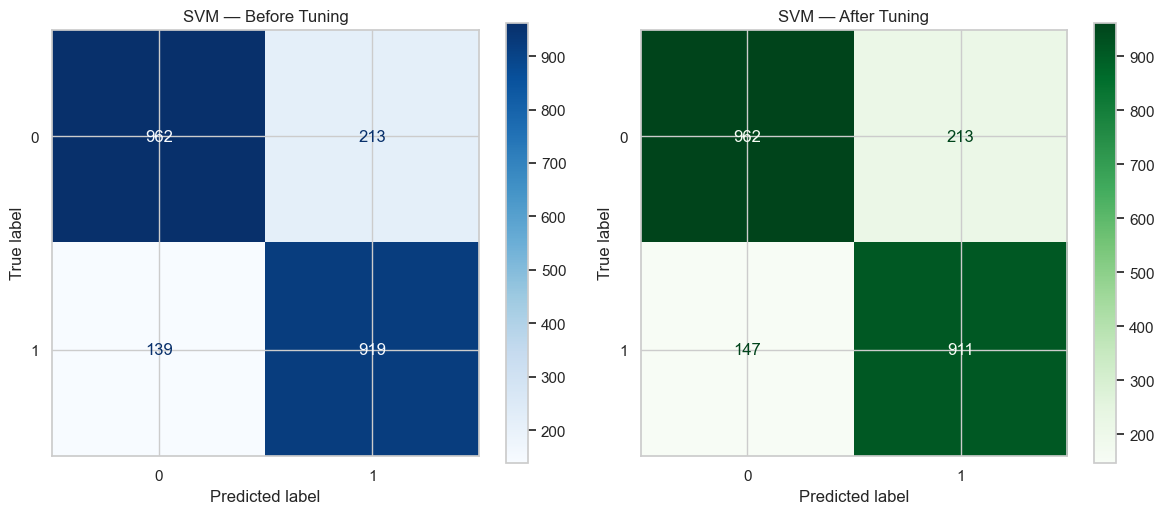

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(svm_baseline, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("SVM — Before Tuning")

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title("SVM — After Tuning")

plt.tight_layout()
plt.show()

## Comparison Table

In [9]:
svm_comparison = pd.DataFrame(
    [baseline_results_svm, tuned_results_svm],
    index=['Before Tuning', 'After Tuning']
)

svm_comparison

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Before Tuning,0.842365,0.811837,0.868620,0.839269,0.908607
After Tuning,0.838782,0.810498,0.861059,0.835014,0.911705


# Hyperparameter Tuning Result Interpretation

### Overall Performance Comparison

| Model        | Accuracy | Precision | Recall | F1-score | AUC-ROC |
| ------------ | -------- | --------- | ------ | -------- | ------- |
| RF Baseline  | 0.845    | 0.813     | 0.873  | 0.842    | 0.911   |
| RF Tuned     | 0.841    | 0.806     | 0.874  | 0.839    | 0.912   |
| SVM Baseline | 0.842    | 0.812     | 0.869  | 0.839    | 0.909   |
| SVM Tuned    | 0.839    | 0.810     | 0.861  | 0.835    | 0.912   |

### Computational Cost Comparison

| Model         | Parameter Combinations | Total Fits | Training Time |
| ------------- | ---------------------- | ---------- | ------------- |
| Random Forest | 216                    | 1,080      | ~20 minutes   |
| SVM           | 32                     | 160        | ~15 minutes   |

### Tuning Effectiveness

**Random Forest:**
- Minimal performance changes (±0.007 across metrics)
- Slight recall improvement (+0.001)
- Marginal AUC-ROC improvement (+0.001)

**SVM:**
- Small performance decreases in most metrics
- Notable recall decrease (-0.008)
- Best AUC-ROC improvement (+0.003) among all changes

### Random Forest Tuning Impact

- **Positive**: Slight recall and AUC-ROC improvements
- **Negative**: Small decreases in accuracy, precision, and F1-score
- **Overall**: Minimal net benefit from extensive tuning

### SVM Tuning Impact

- **Positive**: Best AUC-ROC improvement observed
- **Negative**: Performance degradation in primary classification metrics
- **Overall**: Questionable value given decreased performance in key areas

### Algorithm-Specific Insights

- **Random Forest**: Default parameters already near-optimal for this dataset
- **SVM**: More sensitive to parameter changes but tuning didn't yield clear benefits
- **Both**: Demonstrates diminishing returns for hyperparameter tuning on well-performing baseline models

### Model Selection

**Recommend Baseline Random Forest** because:
- Highest overall performance across most metrics
- Minimal benefit from extensive tuning
- More stable and predictable performance

### Tuning Strategy

For future projects:
- Start with Random Search for more efficient exploration
- Focus tuning efforts on underperforming models
- Consider early stopping criteria to reduce computational cost
- Evaluate cost-benefit ratio before extensive tuning

### Production Deployment

- Use Random Forest with default parameters
- Monitor model performance over time
- Consider periodic re-evaluation rather than continuous tuning

### Conclusion

Hyperparameter tuning for both Random Forest and SVM classifiers yielded minimal performance improvements that don't justify the substantial computational costs. The baseline Random Forest model demonstrates superior and more consistent performance across all evaluation metrics, making it the recommended choice for production deployment.

This outcome highlights that for well-structured datasets like the bank marketing data, sophisticated algorithms with default parameters can achieve excellent performance without extensive tuning. The resources spent on hyperparameter optimization might be better allocated to feature engineering, data quality improvement, or model interpretation efforts.